In [1]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.layers import Activation
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('train data dim:', x_train.shape)
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)
print('max of train data:',np.max(x_train))
print('min of train data:',np.min(x_train))
print('max of test data:',np.max(x_test))
print('min of test data:',np.min(x_test))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of train data: 255
min of train data: 0
max of test data: 255
min of test data: 0


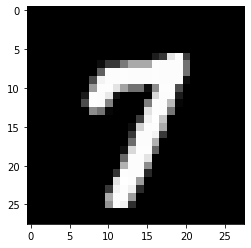

label: 7


In [4]:
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
# plot using plt.imshow() & plt.show()
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
# print its label
print('label:', y_train[rand_num])

In [5]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [6]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [10]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 3,
                    verbose = 1,
                    validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 16s 336us/step - loss: 2.2051 - acc: 0.2543 - val_loss: 1.6677 - val_acc: 0.6141
Epoch 2/3
48000/48000 [==============================] - 15s 318us/step - loss: 0.8488 - acc: 0.7586 - val_loss: 0.5109 - val_acc: 0.8531
Epoch 3/3
48000/48000 [==============================] - 14s 291us/step - loss: 0.4619 - acc: 0.8670 - val_loss: 0.3804 - val_acc: 0.8919


In [12]:
te_score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', te_score[0])
print('Test accuracy:', te_score[1])



Test Loss: 1.794979426582111
Test accuracy: 0.8862


In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [64]:
x_train.shape

(60000, 28, 28)

In [65]:
x_train = x_train.reshape(60000, 1, 28, 28)
x_test = x_test.reshape(10000, 1, 28, 28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [66]:
x_train.shape[0:]

(60000, 1, 28, 28)

In [67]:
y_train.shape

(60000, 10)

In [68]:
#CNN Version

num_classes = 10
model2 = Sequential()
model2.add(Conv2D(32,(3,3),padding='same',input_shape=(1,28,28),data_format='channels_first'))
# model2.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[0:],data_format='channels_first'))
# model2.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
# model2.add(Conv2D(32,kernel_size=(3,3)))
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
# model2.add(Conv2D(64,kernel_size=(3,3),padding='same'))
model2.add(Conv2D(64,(3,3),padding='same'))
model2.add(Activation('relu'))
# model2.add(Conv2D(64,kernel_size=(3,3)))
model2.add(Conv2D(64,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation = 'softmax'))
# model2.add(Activation(tf.nn.softmax))
# model2.add(Activation(tf.nn.softmax))

In [69]:
for layer in model2.layers:
    print(layer.output_shape)

(None, 32, 28, 28)
(None, 32, 28, 28)
(None, 30, 26, 32)
(None, 30, 26, 32)
(None, 15, 13, 32)
(None, 15, 13, 32)
(None, 15, 13, 64)
(None, 15, 13, 64)
(None, 13, 11, 64)
(None, 13, 11, 64)
(None, 6, 5, 64)
(None, 1920)
(None, 512)
(None, 512)
(None, 512)
(None, 10)


In [70]:
# sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
# model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 28, 28)        320       
_________________________________________________________________
activation_34 (Activation)   (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 26, 32)        8096      
_________________________________________________________________
activation_35 (Activation)   (None, 30, 26, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 13, 64)        18496     
__________

In [71]:
#model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=100)
model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
scores = model2.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 354s 6ms/step - loss: 14.4854 - acc: 0.1012 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 2/10
60000/60000 [==============================] - 364s 6ms/step - loss: 14.5286 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 3/10
 1056/60000 [..............................] - ETA: 5:19 - loss: 14.5765 - acc: 0.0956

KeyboardInterrupt: 